<a href="https://colab.research.google.com/github/shivangibithel/IRMiDis_Task2/blob/main/Muller's_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Required Files to be imported -->

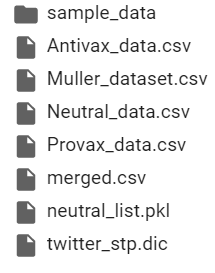


# Import Data files

In [36]:
import pandas as pd

In [214]:
data = pd.read_csv("Muller_dataset.csv")
from sklearn.utils import shuffle
data = shuffle(data)
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4956 entries, 2264 to 1451
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tweet_id     4956 non-null   int64  
 1   agreement    4956 non-null   float64
 2   num_labels   4956 non-null   int64  
 3   label        4956 non-null   int64  
 4   tweet_id.1   4956 non-null   float64
 5   user_name    4956 non-null   object 
 6   user_id      4956 non-null   float64
 7   in_reply_to  4956 non-null   object 
 8   retweet      4956 non-null   int64  
 9   friends      4956 non-null   int64  
 10  followers    4956 non-null   int64  
 11  status       4956 non-null   int64  
 12  verified     4956 non-null   int64  
 13  tweet        4956 non-null   object 
 14  protected    4956 non-null   int64  
dtypes: float64(3), int64(9), object(3)
memory usage: 619.5+ KB
None


,tweet_id,agreement,num_labels,label,tweet_id.1,user_name,user_id,in_reply_to,retweet,friends,followers,status,verified,tweet,protected
2264,194283548763635716,0.666667,3,0,5.620000e+17,jillscurlock,22576498.0,None,0,484,523,11416,0,If your child is old enough to be vaccinated &...,0
3260,582313445518888960,1.000000,3,-1,4.620000e+17,IndianapolisCP,62169540.0,None,0,1935,5,332950,0,Indiana CDC push for more infant vaccinations...,0
4302,571178551233413120,0.666667,3,-1,5.670000e+17,MilwaukeeCP,70949821.0,None,0,2169,8,309364,0,“I’d rather be safe than sorry:” Health depart...,0
825,369919213936181248,1.000000,3,0,5.210000e+17,joem5636,338426074.0,None,0,38,58,970,0,NYTimes: Fear of Vaccines Goes Viral http://t....,0
3891,505199354706407424,0.666667,3,-1,5.660000e+17,isaac32767,86202074.0,thayelf,0,661,904,94676,0,@thayelf Has he seen the Roald Dahl measles th...,0


In [37]:
# data = pd.read_csv("merged.csv")
# from sklearn.utils import shuffle
# data = shuffle(data)
# print(data.info())
# data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16350 entries, 15350 to 11582
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tweet_id     16350 non-null  int64  
 1   agreement    16350 non-null  float64
 2   num_labels   16350 non-null  int64  
 3   label        16350 non-null  int64  
 4   tweet_id.1   16350 non-null  float64
 5   user_name    16350 non-null  object 
 6   user_id      16350 non-null  float64
 7   in_reply_to  16350 non-null  object 
 8   retweet      16350 non-null  int64  
 9   friends      16350 non-null  int64  
 10  followers    16350 non-null  int64  
 11  status       16350 non-null  int64  
 12  verified     16350 non-null  int64  
 13  tweet        16350 non-null  object 
 14  protected    16350 non-null  int64  
dtypes: float64(3), int64(9), object(3)
memory usage: 2.0+ MB
None


,tweet_id,agreement,num_labels,label,tweet_id.1,user_name,user_id,in_reply_to,retweet,friends,followers,status,verified,tweet,protected
15350,581265840236048384,0.666667,3,1,7.690000e+17,robfreedman,3587701.0,None,1,1137,1472,12932,0,Vaccinations are complete I'm all set for my ...,0
9936,563724278227419136,0.666667,3,1,4.790000e+17,TheDon2108,257654105.0,None,0,2281,3353,130188,0,I'm one the kids who got vaccinated back in th...,0
13338,573869338907795457,1.000000,3,1,5.600000e+17,mariannefavro,306420556.0,None,72,1915,73,1914,0,Santa Clara co. Public health dept confirms po...,0
15216,261502957458186241,0.666667,3,0,5.630000e+17,Cha_neen,538483342.0,None,0,229,502,15346,0,Vaccinate your damn kids,0
9356,567057742888984577,1.000000,3,1,3.940000e+17,Caunger11,548258205.0,None,0,510,863,23345,0,I just leaned my last page of drill today in m...,0


# Dynamics of AntiVax, ProVax, Neutral

In [166]:
# Neutral_data = data[data['label'] == 0]
# Antivax_data = data[data['label'] == -1]
# Provax_data = data[data['label'] == 1]

In [167]:
# Neutral_data = shuffle(Neutral_data)
# Neutral_data = Neutral_data[:1652]
# Provax_data = shuffle(Provax_data)
# Provax_data = Provax_data[:1652]

In [205]:
# Neutral_data.to_csv('Neutral_data.csv',index=False)
# Provax_data.to_csv('Provax_data.csv',index=False)
# Antivax_data.to_csv('Antivax_data.csv',index=False)

In [208]:
Antivax_data = pd.read_csv("Antivax_data.csv")
print(Antivax_data.info())
Antivax_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tweet_id     1652 non-null   int64  
 1   agreement    1652 non-null   float64
 2   num_labels   1652 non-null   int64  
 3   label        1652 non-null   int64  
 4   tweet_id.1   1652 non-null   float64
 5   user_name    1652 non-null   object 
 6   user_id      1652 non-null   float64
 7   in_reply_to  1652 non-null   object 
 8   retweet      1652 non-null   int64  
 9   friends      1652 non-null   int64  
 10  followers    1652 non-null   int64  
 11  status       1652 non-null   int64  
 12  verified     1652 non-null   int64  
 13  tweet        1652 non-null   object 
 14  protected    1652 non-null   int64  
dtypes: float64(3), int64(9), object(3)
memory usage: 193.7+ KB
None


,tweet_id,agreement,num_labels,label,tweet_id.1,user_name,user_id,in_reply_to,retweet,friends,followers,status,verified,tweet,protected
0,563178267797360640,0.666667,3,-1,5.130000e+17,juliasberle,3.395107e+07,ModelCarolAlt,0,1079,1001,6180,0,@ModelCarolAlt my son pre/post MMR. Vaccines a...,0
1,363135958385823744,0.666667,3,-1,5.650000e+17,janesa_xo,1.199747e+09,None,0,1739,1211,93872,0,i don't believe in any medication beyond child...,0
2,514613414296309760,0.666667,3,-1,1.720000e+17,OtakuJedi,2.837314e+07,None,0,471,1975,5807,0,Your stupidity is not contagious. Too bad ther...,0
3,525024138172178432,1.000000,3,-1,5.230000e+17,InfectiousPS,2.827493e+08,None,2,950,420,3154,0,Scared of shots but it's worth it. Let's vacci...,0
4,306618020845998081,1.000000,3,-1,5.750000e+16,ManyMenRecords,1.993288e+08,None,0,2693,3810,4322,0,It's a celebration everytime we link up #Sprin...,0


In [207]:
Provax_data = pd.read_csv("Provax_data.csv")
print(Provax_data.info())
Provax_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tweet_id     1652 non-null   int64  
 1   agreement    1652 non-null   float64
 2   num_labels   1652 non-null   int64  
 3   label        1652 non-null   int64  
 4   tweet_id.1   1652 non-null   float64
 5   user_name    1652 non-null   object 
 6   user_id      1652 non-null   float64
 7   in_reply_to  1652 non-null   object 
 8   retweet      1652 non-null   int64  
 9   friends      1652 non-null   int64  
 10  followers    1652 non-null   int64  
 11  status       1652 non-null   int64  
 12  verified     1652 non-null   int64  
 13  tweet        1652 non-null   object 
 14  protected    1652 non-null   int64  
dtypes: float64(3), int64(9), object(3)
memory usage: 193.7+ KB
None


,tweet_id,agreement,num_labels,label,tweet_id.1,user_name,user_id,in_reply_to,retweet,friends,followers,status,verified,tweet,protected
0,253588891884474369,0.666667,3,1,5.600000e+17,mrmclively,8.920377e+08,None,0,6778,2586,6018,0,NPR: To Protect His Son A Father Asks School ...,0
1,684189771757924352,0.666667,3,1,3.350000e+17,Chikies_xD,1.022930e+09,None,0,29,66,669,0,@rickyreddd be an asl translator with mmr or o...,0
2,561566395675443201,0.666667,3,1,1.910000e+17,lizzmitchell,3.525922e+07,realDonaldTrump,0,238,588,2838,0,@realDonaldTrump: Many many people are thankin...,0
3,557682656524394497,1.000000,3,1,4.620000e+17,MardisMichele,2.291678e+09,julie_luck,0,19,28,927,0,@julie_luck @WFMY what is wrong with these peo...,0
4,564157624208588800,1.000000,3,1,5.710000e+17,Chicago_CP,5.554066e+07,None,0,4695,33,451044,0,Cases of measles rises to 15 in Cook County: A...,0


In [206]:
Neutral_data = pd.read_csv("Neutral_data.csv")
print(Neutral_data.info())
Neutral_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tweet_id     1652 non-null   int64  
 1   agreement    1652 non-null   float64
 2   num_labels   1652 non-null   int64  
 3   label        1652 non-null   int64  
 4   tweet_id.1   1652 non-null   float64
 5   user_name    1652 non-null   object 
 6   user_id      1652 non-null   float64
 7   in_reply_to  1652 non-null   object 
 8   retweet      1652 non-null   int64  
 9   friends      1652 non-null   int64  
 10  followers    1652 non-null   int64  
 11  status       1652 non-null   int64  
 12  verified     1652 non-null   int64  
 13  tweet        1652 non-null   object 
 14  protected    1652 non-null   int64  
dtypes: float64(3), int64(9), object(3)
memory usage: 193.7+ KB
None


,tweet_id,agreement,num_labels,label,tweet_id.1,user_name,user_id,in_reply_to,retweet,friends,followers,status,verified,tweet,protected
0,177460208031907840,1.000000,3,0,3.340000e+17,LegiScanOK,104729708.0,None,0,730,1,78898,0,HB1622 [Update] Firearms; authorizing the carr...,0
1,629710380378402816,0.666667,3,0,5.570000e+17,timstep,49212495.0,ArtKellermannMD,0,396,945,3296,0,“@ArtKellermannMD: latest Measles outbreak no ...,0
2,387187767593021440,0.666667,3,0,5.560000e+17,Condordh,441471869.0,AmericaNewsroom,0,2746,5000,111922,0,@AmericaNewsroom are the measles outbreaks the...,0
3,564874646764650496,0.666667,3,0,5.040000e+17,NewYorkCP,53932318.0,None,0,5571,53,398646,0,City Health Commissioner Offers School Vaccina...,0
4,590862267786354688,1.000000,3,0,5.700000e+17,PhiladelphiaCP,57976284.0,None,0,4433,45,358611,0,CDC And State Health Officials Confirm Suspect...,0


In [213]:
# frames = [Neutral_data, Provax_data, Antivax_data]
# result = pd.concat(frames)
# df = result
# df = shuffle(df)
# df.to_csv('Muller_dataset.csv',index=False)

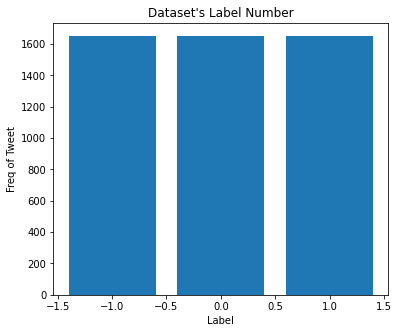

In [210]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,5))
sentiment_count = df.groupby('label').count()
plt.bar(sentiment_count.index.values, sentiment_count['tweet'])
plt.xlabel('Label')
plt.ylabel('Freq of Tweet')
plt.title('Dataset\'s Label Number')
plt.show()

In [211]:
df.label.value_counts()

-1    1652
 1    1652
 0    1652
Name: label, dtype: int64

# Divide data into 3 sets

In [215]:
from sklearn.model_selection import StratifiedShuffleSplit
df
split = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=42)
for train_index, test_valid_index in split.split(df, df.label):
    train_set = df.iloc[train_index]
    test_valid_set = df.iloc[test_valid_index]

split2 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for test_index, valid_index in split2.split(test_valid_set, test_valid_set.label):
    test_set = test_valid_set.iloc[test_index]
    valid_set = test_valid_set.iloc[valid_index]

print(train_set.shape)
print(test_set.shape)
valid_set.shape

(2973, 15)
(991, 15)


(992, 15)

In [216]:
train_set.label.value_counts()

 1    991
-1    991
 0    991
Name: label, dtype: int64

In [217]:
test_set.label.value_counts()

-1    331
 1    330
 0    330
Name: label, dtype: int64

In [220]:
valid_set.label.value_counts()

 1    331
 0    331
-1    330
Name: label, dtype: int64

In [221]:
train_set.to_csv('Muller_dataset_train_set.csv',index=False)
test_set.to_csv('Muller_dataset_test_set.csv',index=False)
valid_set.to_csv('Muller_dataset_valid_set.csv',index=False)

# length of tweets in each class

In [212]:
# determining length of each tweet of each class --> plot some histogram
# length of all tweets
df = Antivax_data
a=[]
for i in range(len(df)):
  a.append(len(Antivax_data['tweet'].iloc[i].split()))
print(max(a))
df = Provax_data
b=[]
for i in range(len(df)):
  b.append(len(df['tweet'].iloc[i].split()))
print(max(b))
df = Neutral_data
c=[]
for i in range(len(df)):
  c.append(len(df['tweet'].iloc[i].split()))
print(max(c))

116
40
44


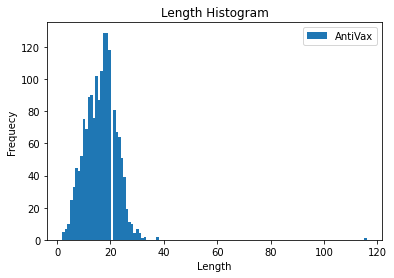

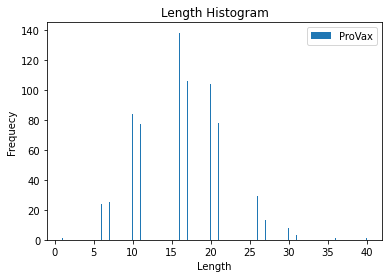

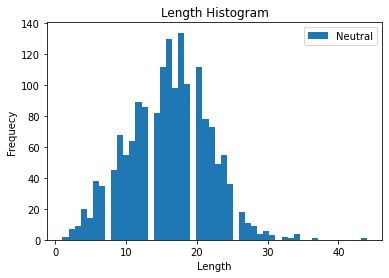

In [174]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import *
plt.hist(a,bins= 120, label = "AntiVax")
plt.legend()
plt.xlabel('Length')
plt.ylabel('Frequecy')
plt.title('Length Histogram')
plt.show()
plt.hist(b,bins= 800, label = "ProVax")
plt.legend()
plt.xlabel('Length')
plt.ylabel('Frequecy')
plt.title('Length Histogram')
plt.show()
plt.hist(c, bins= 50, label = "Neutral")
plt.legend()
plt.xlabel('Length')
plt.ylabel('Frequecy')
plt.title('Length Histogram')
plt.show()

Text(0.5, 1.0, 'Length Histogram')

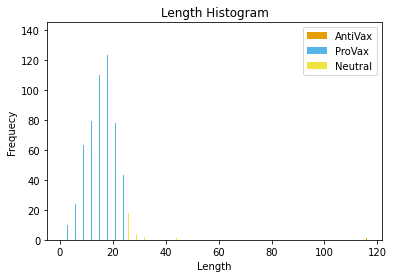

In [175]:
# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9', '#F0E442']
names = ["AntiVax","ProVax","Neutral"]
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.hist([a,b,c], bins = int(800),
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Length')
plt.ylabel('Frequecy')
plt.title('Length Histogram')

# More Tweet Data

In [ ]:
Tweet_df_available = result

### **Verified Accounts moslty post Neutral or ProVax Tweets and Very less AntiVax Tweets**

In [177]:
# Neutral, AntiVax, ProVax, count =0,0, 0,0
# for i in range(len(Tweet_df_available)):
#   if Tweet_df_available['verified'].iloc[i] == True:
#     if Tweet_df_available['label'].iloc[i] == "Neutral":
#       Neutral = Neutral + 1
#     elif Tweet_df_available['label'].iloc[i] == "AntiVax":
#       AntiVax = AntiVax + 1
#     elif Tweet_df_available['label'].iloc[i] == "ProVax":
#       ProVax = ProVax + 1
#   count = count + 1
# print(Neutral, AntiVax, ProVax, count)

In [178]:
Neutral, AntiVax, ProVax, count =0,0, 0,0
# Tweet_df_available = df
for i in range(len(Tweet_df_available)):
  if Tweet_df_available['verified'].iloc[i] == 1:
    if Tweet_df_available['label'].iloc[i] == 0:
      Neutral = Neutral + 1
    elif Tweet_df_available['label'].iloc[i] == -1:
      AntiVax = AntiVax + 1
    elif Tweet_df_available['label'].iloc[i] == 1:
      ProVax = ProVax + 1
    count = count + 1
print(Neutral, AntiVax, ProVax, count)

55 43 56 154


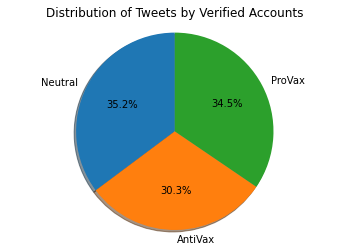

In [179]:
# Piechart
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Neutral', 'AntiVax', 'ProVax'
sizes = [50, 43, 49]
explode = (0, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribution of Tweets by Verified Accounts")
plt.show()

### People with more than 10000 followers, tends to tweet more Neutral and ProVax Tweets 

In [180]:
Neutral, AntiVax, ProVax, count =0,0, 0,0
for i in range(len(Tweet_df_available)):
  if Tweet_df_available['followers'].iloc[i] > 10000:
    if Tweet_df_available['label'].iloc[i] == 0:
      Neutral = Neutral + 1
    elif Tweet_df_available['label'].iloc[i] == -1:
      AntiVax = AntiVax + 1
    elif Tweet_df_available['label'].iloc[i] == 1:
      ProVax = ProVax + 1
    count = count + 1
print(Neutral, AntiVax, ProVax, count)

36 24 30 90


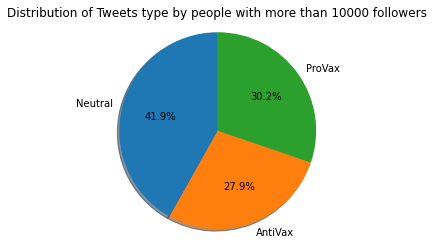

In [181]:
# Piechart
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Neutral', 'AntiVax', 'ProVax'
sizes = [36, 24, 26]
explode = (0, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribution of Tweets type by people with more than 10000 followers")
plt.show()

### **People with more than 1000 friends, tends to post mre neutral and ProVax tweets**

In [182]:
Neutral, AntiVax, ProVax, count =0,0, 0,0
for i in range(len(Tweet_df_available)):
  if Tweet_df_available['friends'].iloc[i] > 10000:
    if Tweet_df_available['label'].iloc[i] == 0:
      Neutral = Neutral + 1
    elif Tweet_df_available['label'].iloc[i] == -1:
      AntiVax = AntiVax + 1
    elif Tweet_df_available['label'].iloc[i] == 1:
      ProVax = ProVax + 1
    count = count + 1
print(Neutral, AntiVax, ProVax, count)

69 63 80 212


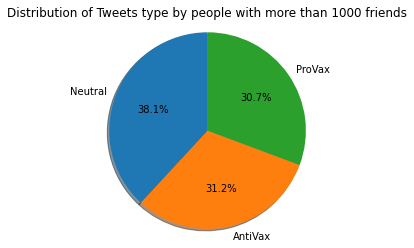

In [183]:
# Piechart
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Neutral', 'AntiVax', 'ProVax'
sizes = [77,63,62]
explode = (0, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribution of Tweets type by people with more than 1000 friends")
plt.show()

### **People who usually posts more than 10000 statuses on their walls, tends to speak about ProVax or Neutral in their Tweets**

In [184]:
# statuses_count
Neutral, AntiVax, ProVax, count =0,0, 0,0
for i in range(len(Tweet_df_available)):
  if Tweet_df_available['status'].iloc[i] > 10000:
    if Tweet_df_available['label'].iloc[i] == 0:
      Neutral = Neutral + 1
    elif Tweet_df_available['label'].iloc[i] == -1:
      AntiVax = AntiVax + 1
    elif Tweet_df_available['label'].iloc[i] == 1:
      ProVax = ProVax + 1
    count = count + 1
print(Neutral, AntiVax, ProVax, count)

1055 997 1063 3115


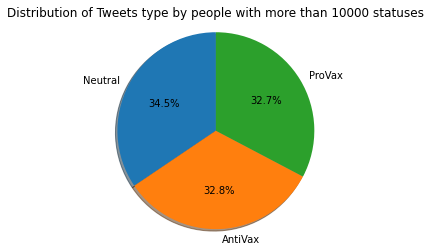

In [185]:
# Piechart
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Neutral', 'AntiVax', 'ProVax'
sizes = [1046, 997, 993]
explode = (0, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribution of Tweets type by people with more than 10000 statuses")
plt.show()

# NER Tagging in the tweets

In [186]:
df = Neutral_data
a=[]
for i in range(len(df)):
  a.append(df['tweet'].iloc[i].split())
print(a)

[['HB1622', '[Update]', 'Firearms;', 'authorizing', 'the', 'carrying', 'of', 'handguns', 'onto', 'private', 'school', 'property;', 'providing', 'immunity', 'f...', 'http://t.co/yOIZOxk1oy'], ['“@ArtKellermannMD:', 'latest', 'Measles', 'outbreak', 'no', 'surprise', 'West', 'LA', 'preschools', 'vax', 'rates', '"on', 'par', 'with', 'Sudan"', 'http://t.co/yipCn0e8vY”', '#1989again'], ['@AmericaNewsroom', 'are', 'the', 'measles', 'outbreaks', 'the', 'result', 'of', 'unvaccinated', 'illegal', 'immigrants??-good', 'investigating', 'would', 'reveal', 'all!'], ['City', 'Health', 'Commissioner', 'Offers', 'School', 'Vaccination', 'Tips:', 'With', 'the', 'start', 'of', 'the', 'school', 'year', 'just', 'around', 'the...', 'http://t.co/iS84CKxC9s'], ['CDC', 'And', 'State', 'Health', 'Officials', 'Confirm', 'Suspected', 'Case', 'Of', 'Measles', 'At', 'Princeton', 'University:', 'Princeton', 'University', 'says…', 'http://t.co/JCVTzgtLoC'], ['Measles', 'found', 'in', 'Tarrant', 'County:', 'A', 'paren

In [187]:
import pickle
with open('neutral_list.pkl', 'wb') as f:
  pickle.dump(a, f)

In [188]:
# with open('neutral_list.pkl', 'rb') as f:
#   neutral_list = pickle.load(f)
# with open('antivax_list.pkl', 'rb') as f:
#   antivax_list = pickle.load(f)
# with open('provax_list.pkl', 'rb') as f:
#   provax_list = pickle.load(f)

In [189]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')
def preprocess(sent):
    # sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent
sent = preprocess(neutral_list[0])
sent

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Hi', 'NNP'),
 ('@DrOz', 'NNP'),
 ('Measles', 'NNP'),
 ('outbreak', 'NN'),
 ('in', 'IN'),
 ('Michigan', 'NNP'),
 ('but', 'CC'),
 ('Michigan', 'NNP'),
 ('Court', 'NNP'),
 ('has', 'VBZ'),
 ('threatened', 'VBN'),
 ('me', 'PRP'),
 ('with', 'IN'),
 ('jail', 'NN'),
 ('time', 'NN'),
 ('if', 'IN'),
 ('I', 'PRP'),
 ('vaccinate', 'VBP'),
 ('daughters.', 'NNS'),
 ('Insane!', 'NNP')]

# Word Frequency of AntiVax Tweets

In [190]:
df = Antivax_data

In [191]:
list_user = []
list_word = []
import re
for sentence in df['tweet']:
  for word in sentence.split():
    if '@' in word:
      mention = re.findall('\w*(@\w+)',word.lower())
      list_user += mention
    else:
      if word != '':
        list_word.append(re.sub('[^A-Za-z0-9]+', '', word.lower()))

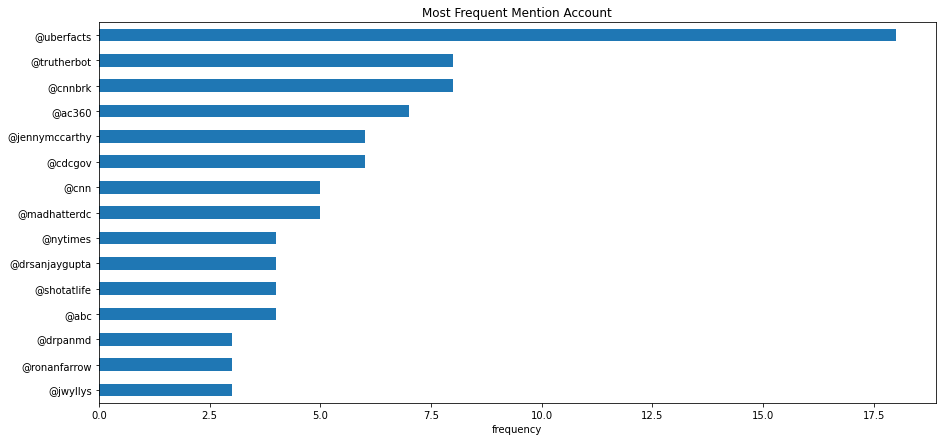

In [192]:
mention_data = pd.DataFrame({'username' : list_user})['username'].value_counts()
mention_data.head(15).sort_values(ascending=True).plot(kind='barh',figsize=(15,7),title='Most Frequent Mention Account')
plt.xlabel('frequency')
plt.show()

In [193]:
#get stopword from file
stp = open('twitter_stp.dic')
stp_words = []
items = stp.readline()
while items != "":
  stp_words.append(items[:-1]) #just read word without /n
  items = stp.readline()
stp_words.append('90')

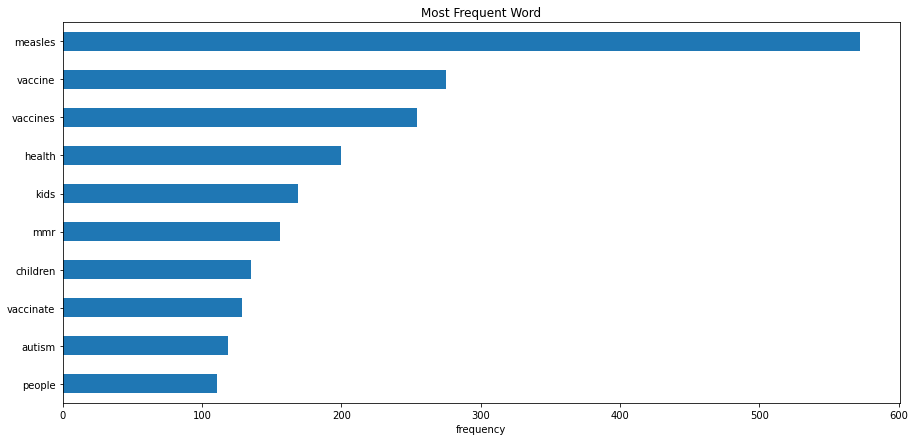

In [194]:
word_count = []
for word in list_word:
  if word not in stp_words and word != '':
    word_count.append(word)
word_data = pd.DataFrame({'word': word_count})['word'].value_counts()
word_data.head(10).sort_values(ascending=True).plot(kind='barh',figsize=(15,7),title='Most Frequent Word')
plt.xlabel('frequency')
plt.show()

# Word Frequency of ProVax Tweets

In [195]:
df = Provax_data

In [196]:
list_user = []
list_word = []
import re
for sentence in df['tweet']:
  for word in sentence.split():
    if '@' in word:
      mention = re.findall('\w*(@\w+)',word.lower())
      list_user += mention
    else:
      if word != '':
        list_word.append(re.sub('[^A-Za-z0-9]+', '', word.lower()))

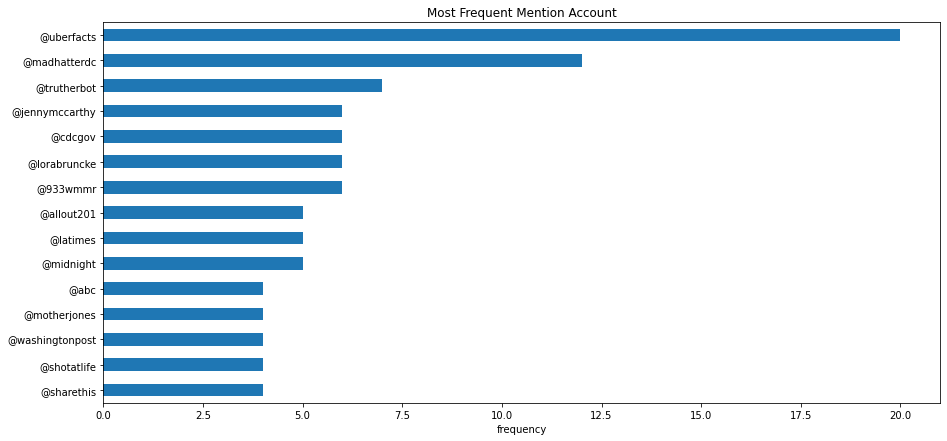

In [197]:
mention_data = pd.DataFrame({'username' : list_user})['username'].value_counts()
mention_data.head(15).sort_values(ascending=True).plot(kind='barh',figsize=(15,7),title='Most Frequent Mention Account')
plt.xlabel('frequency')
plt.show()

In [198]:
#get stopword from file
stp = open('twitter_stp.dic')
stp_words = []
items = stp.readline()
while items != "":
  stp_words.append(items[:-1]) #just read word without /n
  items = stp.readline()
stp_words.append('90')

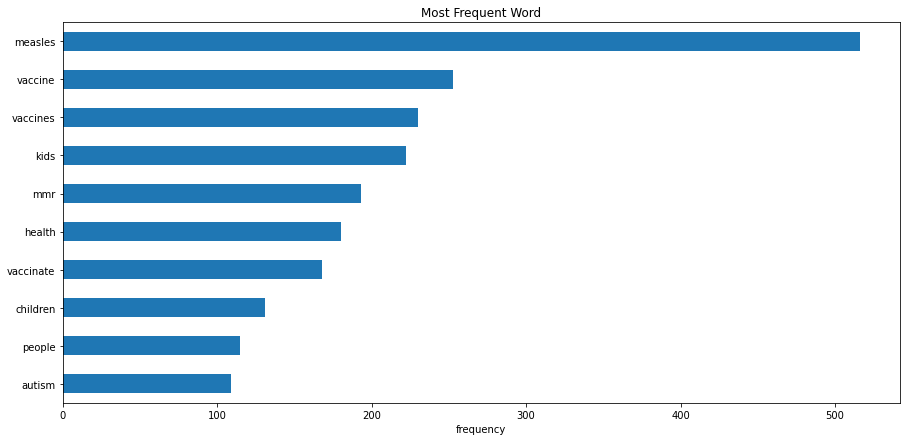

In [199]:
word_count = []
for word in list_word:
  if word not in stp_words and word != '':
    word_count.append(word)
word_data = pd.DataFrame({'word': word_count})['word'].value_counts()
word_data.head(10).sort_values(ascending=True).plot(kind='barh',figsize=(15,7),title='Most Frequent Word')
plt.xlabel('frequency')
plt.show()

# Word Frequency of Neutral Tweets

In [200]:
df = Neutral_data

In [201]:
list_user = []
list_word = []
import re
for sentence in df['tweet']:
  for word in sentence.split():
    if '@' in word:
      mention = re.findall('\w*(@\w+)',word.lower())
      list_user += mention
    else:
      if word != '':
        list_word.append(re.sub('[^A-Za-z0-9]+', '', word.lower()))

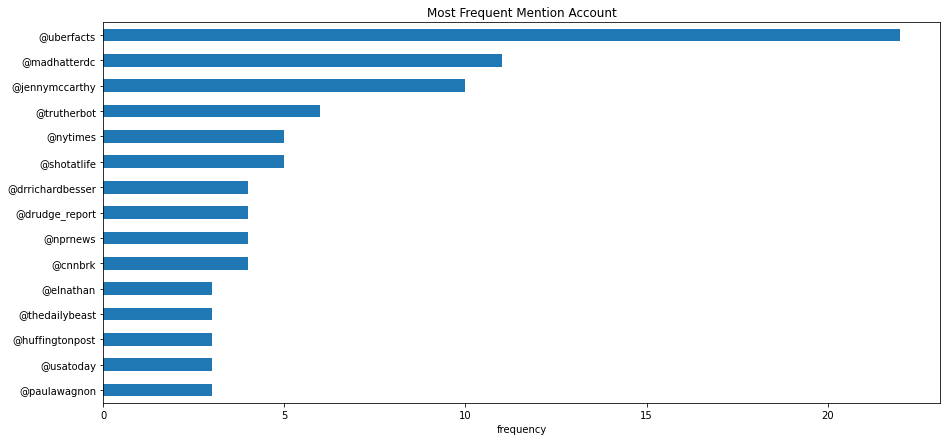

In [202]:
mention_data = pd.DataFrame({'username' : list_user})['username'].value_counts()
mention_data.head(15).sort_values(ascending=True).plot(kind='barh',figsize=(15,7),title='Most Frequent Mention Account')
plt.xlabel('frequency')
plt.show()

In [203]:
#get stopword from file
stp = open('twitter_stp.dic')
stp_words = []
items = stp.readline()
while items != "":
  stp_words.append(items[:-1]) #just read word without /n
  items = stp.readline()
stp_words.append('90')

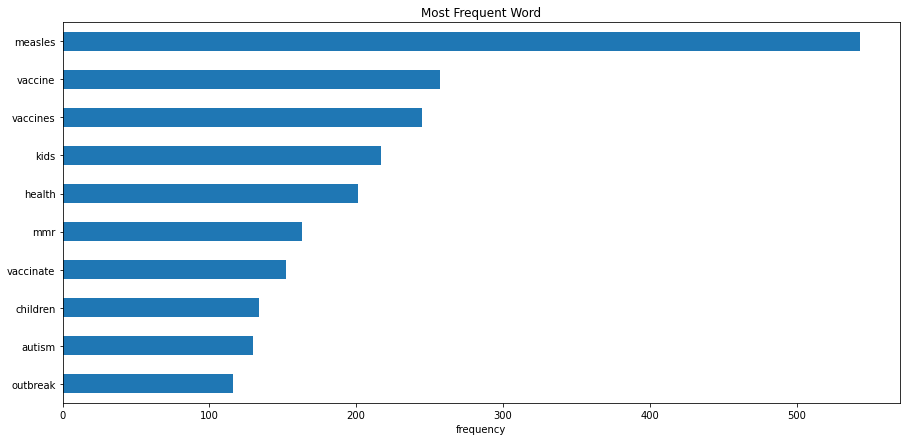

In [204]:
word_count = []
for word in list_word:
  if word not in stp_words and word != '':
    word_count.append(word)
word_data = pd.DataFrame({'word': word_count})['word'].value_counts()
word_data.head(10).sort_values(ascending=True).plot(kind='barh',figsize=(15,7),title='Most Frequent Word')
plt.xlabel('frequency')
plt.show()

# NER Tagging ProVax

In [164]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')
def preprocess(sent):
    # sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent
Provax_NER = []
for i in range(len(neutral_list)):
  sent = preprocess(neutral_list[i])
  Provax_NER.append(sent)
Provax_NER[0]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Hi', 'NNP'),
 ('@DrOz', 'NNP'),
 ('Measles', 'NNP'),
 ('outbreak', 'NN'),
 ('in', 'IN'),
 ('Michigan', 'NNP'),
 ('but', 'CC'),
 ('Michigan', 'NNP'),
 ('Court', 'NNP'),
 ('has', 'VBZ'),
 ('threatened', 'VBN'),
 ('me', 'PRP'),
 ('with', 'IN'),
 ('jail', 'NN'),
 ('time', 'NN'),
 ('if', 'IN'),
 ('I', 'PRP'),
 ('vaccinate', 'VBP'),
 ('daughters.', 'NNS'),
 ('Insane!', 'NNP')]

In [ ]:
Provax_NER

In [165]:
df = pd.DataFrame(Provax_NER)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,"(Hi, NNP)","(@DrOz, NNP)","(Measles, NNP)","(outbreak, NN)","(in, IN)","(Michigan, NNP)","(but, CC)","(Michigan, NNP)","(Court, NNP)","(has, VBZ)","(threatened, VBN)","(me, PRP)","(with, IN)","(jail, NN)","(time, NN)","(if, IN)","(I, PRP)","(vaccinate, VBP)","(daughters., NNS)","(Insane!, NNP)",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,"(Protecting, VBG)","(my, PRP$)","(baby, NN)","((and, NNP)","(others), NN)","(by, IN)","(getting, VBG)","(a, DT)","(whooping, JJ)","(cough, NN)","(vaccine, NN)","(before, IN)","(work., JJ)","((@, NNP)","(Clay, NNP)","(County, NNP)","(Health, NNP)","(Department), NNP)","(http://t.co/oEuspcEo, NN)",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,"(Considering, VBG)","(myself, PRP)","(lucky, JJ)","(that, IN)","(my, PRP$)","(pediatrician, NN)","(failed, VBD)","(to, TO)","(record, VB)","(my, PRP$)","(MMR, NNP)","(booster, NN)","(back-when, NN)","(so, IN)","(I, PRP)","(had, VBD)","(to, TO)","(re-immunize, VB)","(5, CD)","(yrs, NN)","(ago, RB)","(at, IN)","(ASU's, NNP)","(req., NN)",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,"(@cnnbrk, VB)","(how, WRB)","(about, IN)","(using, VBG)","(Ebola, NNP)","(as, IN)","(a, DT)","(platform, NN)","(for, IN)","(#Vaccines, NNS)","(that, WDT)","(parents, NNS)","(refuse, VBP)","(to, TO)","(give, VB)","(kids, NNS)","(against, IN)","(deadly, JJ)","(diseases, NNS)","(that, WDT)","(we've, VBP)","(already, RB)","(wiped?, VBN)","(with, IN)","(73%, CD)","(related, JJ)","(to, TO)","(Disney, NNP)","(CDC, NNP)","(says, VBZ)","(http://t.co/Q02B2ZL10G"", NN)",None,None,None,None,None,None,None,None,None,None,None,None
4,"(I, PRP)","(miss, VBP)","(my, PRP$)","(generation.., NN)","(Protests.., NNP)","(Playing, NNP)","(in, IN)","(the, DT)","(front, NN)","(yard.., JJ)","(School, NNP)","(vaccine, NN)","(day..., NN)","(Bring, NNP)","(those, DT)","(days, NNS)","(back, RB)",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
